# Coastlines Near Taiwan
In this notebook, I extract coastlines of countries near Taiwan. Only coastlines within a range of 1250 km from the center of Taiwan is needed. The extracted coastlines will be used in visualization and don't need to be very detailed. Many islands are omitted.

## Prerequisites
Before running this notebook, one needs to download a dataset from https://www.naturalearthdata.com/downloads/10m-cultural-vectors/. Go to the section `Admin 0 – Countries` and click the button `Download countries`. Unzip the downloaded file and put it in `datasets/naturalearthdata/`. The resulting directory structure is like

In [1]:
! tree ../datasets/naturalearthdata/

../datasets/naturalearthdata/
└── ne_10m_admin_0_countries
    ├── ne_10m_admin_0_countries.cpg
    ├── ne_10m_admin_0_countries.dbf
    ├── ne_10m_admin_0_countries.prj
    ├── ne_10m_admin_0_countries.README.html
    ├── ne_10m_admin_0_countries.shp
    ├── ne_10m_admin_0_countries.shx
    └── ne_10m_admin_0_countries.VERSION.txt

1 directory, 7 files


## The program starts here

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
gdf = gpd.read_file('../datasets/naturalearthdata/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp')

Only coastlines of a few lands of a few countries are needed.

In [4]:
boundaries = [
    np.array(gdf[gdf['SOVEREIGNT'] == country]['geometry'].iat[0].boundary.geoms[land_idx].xy)
for country, land_idx in [
    ('Taiwan', 0),
    ('China', 0),
    ('China', 1),
    ('Philippines', 15),
    ('Philippines', 48),
    ('Japan', 1),
    ('Japan', 2),
    ('Japan', 6),
    ('South Korea', 0),
    ('Vietnam', 0),
]]

Here I convert latitudes and longitudes into kilometers. See `data_cleaning/cyclones_near_taiwan.ipynb` for details of the math.

In [5]:
taiwan_loc = (121., 23.5)
km_per_lon, km_per_lat = 102., 111.2
border = 1250.
for bound in boundaries:
    bound[0] = (bound[0] - taiwan_loc[0]) * km_per_lon
    bound[1] = (bound[1] - taiwan_loc[1]) * km_per_lat

Here plots the extracted coastlines.

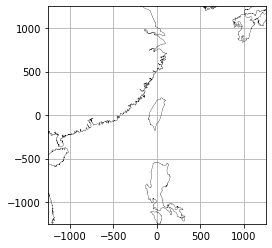

In [6]:
fig, ax = plt.subplots()
for bound in boundaries:
    ax.plot(bound[0], bound[1], c='black', linewidth=.3)
ax.set_aspect('equal')
ax.set_xlim((-border, border))
ax.set_ylim((-border, border));
ax.grid();

Here saves the extracted coastlines as a file for later usage.

In [7]:
with open('../repository/coastlines_near_taiwan.npy', 'wb') as f:
    for bound in boundaries:
        np.save(f, bound)

The program ends here.

## Environment

In [8]:
import sys, os, subprocess
print('I run this jupyter notebook in a conda environment called ', end='')
print(sys.executable.split('/')[-3])
filename = 'coastlines_near_taiwan.ipynb'
subprocess.check_output([
    'pipreqsnb', '--use-local', '--print', 
    os.path.join(os.getcwd(), filename)
]).decode().strip().split('\n')[:-1]

I run this jupyter notebook in a conda environment called spatial


INFO: Successfully output requirements


['geopandas==0.10.2', 'matplotlib==3.4.3', 'numpy==1.21.4']